In [596]:
import pandas as pd
import numpy as np

In [597]:
# 读取数据(如果想要读取自己的记得更改文件路径)
data = pd.read_csv('C:/Users/86187/Downloads/house.csv')
data.head()

C:\Users\86187\AppData\Local\Temp\ipykernel_14528\229430158.py:2: DtypeWarning: Columns (11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/86187/Downloads/house.csv')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/BJSY02072263....,BJSY02072263,116.632377,40.033796,1.111030e+12,2011/10/29,NaN,0,0.1,1,...,4.0,2001,1,4,0.5,0.0,1.0,0.0,13,29574.0
1,https://bj.lianjia.com/chengjiao/BJHD00299247....,BJHD00299247,116.353539,39.979585,1.111030e+12,2011/8/6,NaN,0,0.1,1,...,1.0,1998,1,6,0.3,1.0,0.0,1.0,8,75239.0
2,https://bj.lianjia.com/chengjiao/BJHD88951551....,BJHD88951551,116.324021,40.050993,1.111030e+12,2015/2/28,1.0,0,0.1,1,...,3.0,2008,1,6,0.5,1.0,0.0,0.0,8,63665.0
3,https://bj.lianjia.com/chengjiao/BJSY15751880....,BJSY15751880,116.683117,40.127185,1.111030e+12,2011/11/1,NaN,0,0.1,1,...,4.0,2004,1,2,0.5,1.0,0.0,0.0,13,37937.0
4,https://bj.lianjia.com/chengjiao/BJSY84271148....,BJSY84271148,116.661432,40.180564,1.111030e+12,2012/2/26,NaN,0,0.1,1,...,4.0,2001,1,2,0.5,0.0,0.0,0.0,13,31282.0


In [598]:
# 数据规格(统共318851行26列)
data.shape

(318851, 26)

In [599]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [600]:
# 扔掉url、id、DOM和fiveYearsProperty这几列(之后不会再考虑这几个方面的问题)
data = data.drop(['url', 'id', 'DOM','fiveYearsProperty'], axis=1)
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [601]:
# 删去totalPrice为0.1的数据(这些数据经观察不合法)
count = (data['totalPrice'] == 0.1).sum()
print(f"totalPrice中等于0.1的行数为: {count}")
data = data[data['totalPrice'] != 0.1]
data['totalPrice']

totalPrice中等于0.1的行数为: 227


225          0.2
228          0.2
229          1.0
230          1.0
231          1.0
           ...  
318846     666.0
318847     982.5
318848    1665.0
318849     720.0
318850    4250.0
Name: totalPrice, Length: 318624, dtype: float64

In [602]:
# 删除constructionTime为Î´Öª的数据(这些数据经观察不合法)
count = (data['constructionTime']=='Î´Öª').sum()
print(f"constructionTime中非法数据的行数为: {count}")
data = data[data['constructionTime'] != 'Î´Öª']
data['constructionTime']

constructionTime中非法数据的行数为: 19266


225       2002
228       1996
229       2002
230       1992
231       1993
          ... 
318845    2004
318846    2004
318847    1999
318848    2003
318849    1985
Name: constructionTime, Length: 299358, dtype: object

In [603]:
# 取出floor部分的楼层而删除他在楼中的相对高度(不考虑相对高度)
data['floor'] = data['floor'].str.split(' ').str[1]
data['floor']

225        5
228        9
229        7
230        6
231        6
          ..
318845    14
318846    16
318847    12
318848    19
318849     6
Name: floor, Length: 299358, dtype: object

In [604]:
data.shape

(299358, 22)

In [605]:
# 此外buildingType数据仍有缺失我们直接删除即可
data.dropna(subset=['buildingType'], inplace=True) #丢掉nan的部分
data.shape

(297813, 22)

In [606]:
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [607]:
data['tradeTime']

225        2011/9/26
228        2014/9/16
229       2015/12/16
230        2016/7/30
231       2013/11/30
             ...    
318845     2017/2/18
318846      2017/5/7
318847     2016/7/25
318848     2017/2/15
318849      2017/3/6
Name: tradeTime, Length: 297813, dtype: object

In [608]:
data.drop(['totalPrice'], axis=1) #丢掉communityAverage这一列
# 添加新的列tradeTimeModefiy,将tradeTime转化为天数
tradeTimeModefiy = data['tradeTime'].str.split('/').str[0].astype(int)*365 + data['tradeTime'].str.split('/').str[1].astype(int)*30 + data['tradeTime'].str.split('/').str[2].astype(int)
data['tradeTimeModefiy'] = tradeTimeModefiy

In [609]:
data['tradeTimeModefiy']

225       734311
228       735396
229       735851
230       736080
231       735105
           ...  
318845    736283
318846    736362
318847    736075
318848    736280
318849    736301
Name: tradeTimeModefiy, Length: 297813, dtype: int64

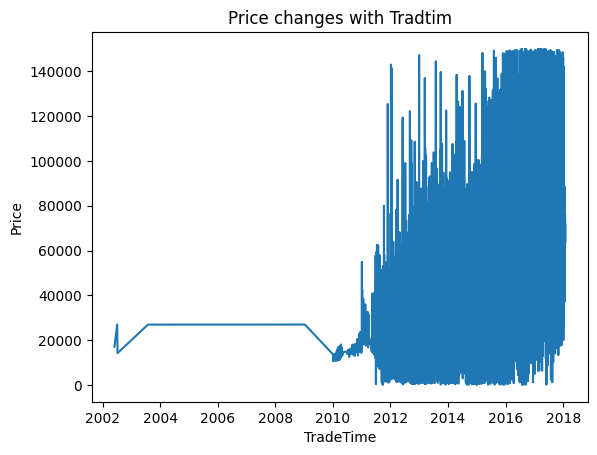

In [610]:
import matplotlib.pyplot as plt

# 转化为datetime类型
data['tradeTime'] = pd.to_datetime(data['tradeTime'])
# 根据tradeTime对数据进行排序
data.sort_values('tradeTime', inplace=True)
# 绘制price随tradeTime变化的图
plt.plot(data['tradeTime'], data['price'])
plt.title('Price changes with Tradtim')
plt.xlabel('TradeTime')
plt.ylabel('Price')
plt.show()

In [611]:
# 我们观察图标2011年前的数目很少,如果带入总体数据计算要考虑通胀因素所以考虑删除2010年前的数据
count = (data['tradeTime']<'2011-01-01').sum()
print('2011年前的交易数据总共有:',count)

2011年前的交易数据总共有: 194


In [612]:
data = data[data['tradeTime']>='2011-01-01']

In [613]:
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage', 'tradeTimeModefiy'],
      dtype='object')

C:\Users\86187\AppData\Local\Temp\ipykernel_14528\652213493.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['price'].resample('M').mean()


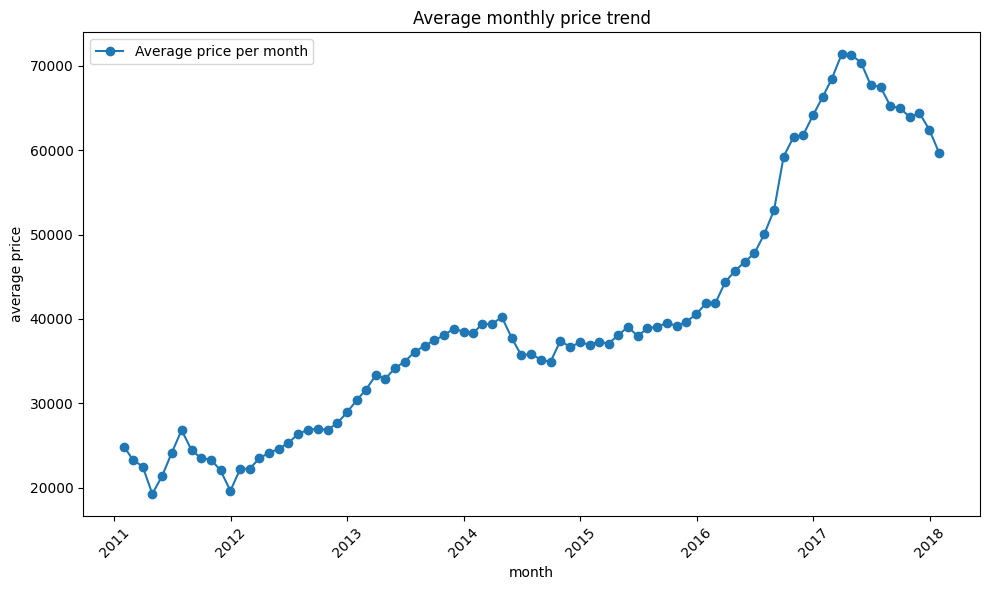

In [614]:
# 将tradeTime列设置为索引
data.set_index('tradeTime', inplace=True)
# 按月重采样并计算平均值，这里假设我们计算的是价格的平均值
monthly_avg = data['price'].resample('M').mean()
plt.figure(figsize=(10, 6))
# 绘制每个月平均值的线图
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', label='Average price per month')
plt.title('Average monthly price trend')
plt.xlabel('month')
plt.ylabel('average price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
data.reset_index(inplace=True)

C:\Users\86187\AppData\Local\Temp\ipykernel_14528\3499363738.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['followers'].resample('M').mean()


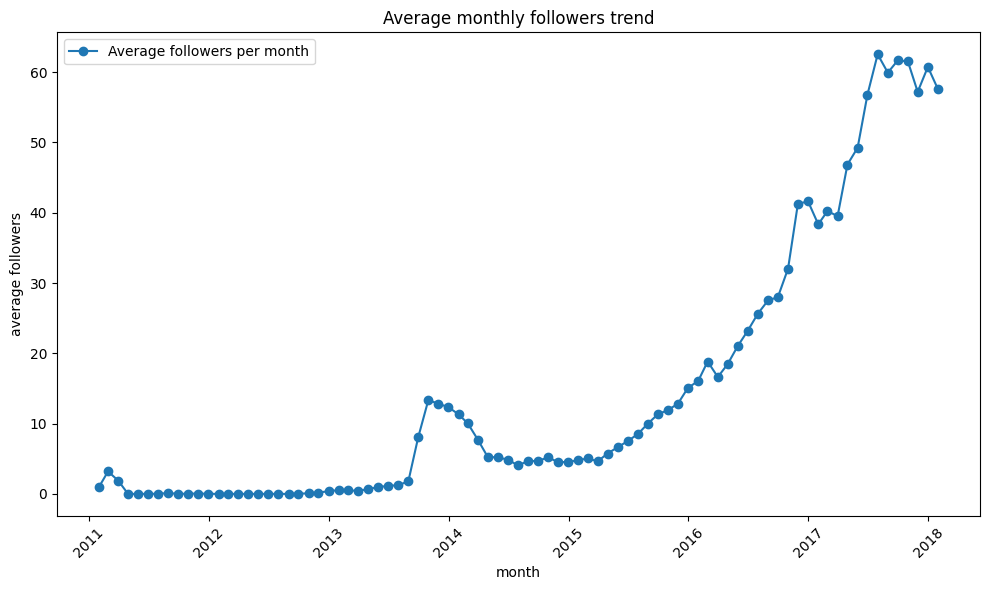

In [615]:
# 将tradeTime列设置为索引
data.set_index('tradeTime', inplace=True)
# 按月重采样并计算平均值，这里假设我们计算的是价格的平均值
monthly_avg = data['followers'].resample('M').mean()
plt.figure(figsize=(10, 6))
# 绘制每个月平均值的线图
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', label='Average followers per month')
plt.title('Average monthly followers trend')
plt.xlabel('month')
plt.ylabel('average followers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
data.reset_index(inplace=True)

In [ ]:
# 2010年至2018年的中国通货膨胀率如下：‌
# 2011年通货膨胀率为5.55%;2012年通货膨胀率为2%;2013年通货膨胀率为2.7%;2014年通货膨胀率为2.3%;2015年通货膨胀率为1.6%;
# 2016年通货膨胀率为1.9%;2017年通货膨胀率为1.5%;2018年通货膨胀率为2.5%;2019年通货膨胀率为2.9%
# 可以发现通货膨胀率在2%左右,对整体房价影响不大我们可以在整个2011到2018年进行讨论